In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


## 整理輸入格式
每筆資料都是 28x28 的陣列，CNN 可以直接讀，不用像之前把資料拉平。但平常圖片會有 R, G, B 三個 channel，每個 channel 都是一個矩陣，也就是一張圖可能是三個矩陣。而在手寫圖中是灰階，只有一個 channel，因此需要將資料從 (28,28) 轉為 (28,28,1)

In [0]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [6]:
x_train[0].shape

(28, 28, 1)

In [0]:
X = x_train[0][:, :, 0]

In [0]:
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

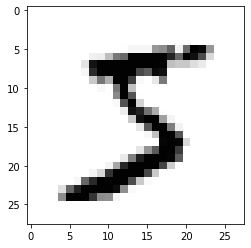

In [8]:
plt.imshow(X, cmap='Greys')

one hot encoding

In [0]:
from keras.utils import np_utils

In [0]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

## CNN
* 做 3 次 convolution，每次都接 max-pooling
* filter 大小都是 3x3，max-pooling 都用 2x2 為一小區塊

CNN 小技巧：每層的 filter 數目是越來越多。做完 convolution 後，要拉平、再送入一個標準的神經網路。這個神經網路的設計：
* 只有 1 個隱藏層，使用 200 個神經元

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD

打開空白的神經網路

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(32, (3,3), padding='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))

In [14]:
model.add(MaxPool2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))

In [0]:
model.add(MaxPool2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))

In [0]:
model.add(MaxPool2D(pool_size=(2,2)))

In [0]:
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))

In [0]:
model.add(Dense(10))
model.add(Activation('softmax'))

## 組裝

In [21]:
model.compile(loss='mse', optimizer=SGD(lr=0.05), metrics=['accuracy'])

## 檢視神經網路

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        

In [0]:
# 320
(3*3+1)*32

320

## 訓練

In [23]:
model.fit(x_train, y_train, batch_size=100, epochs=20)




Epoch 1/20





60000/60000 [==============================] - 18s 305us/step - loss: 0.1791 - acc: 0.1043
Epoch 2/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.1791 - acc: 0.1044
Epoch 3/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.1791 - acc: 0.1044
Epoch 4/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.1794 - acc: 0.1030
Epoch 5/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0963 - acc: 0.4852
Epoch 6/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0063 - acc: 0.9584
Epoch 7/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0041 - acc: 0.9733
Epoch 8/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0031 - acc: 0.9798
Epoch 9/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0024 - acc: 0.9843
Epoch 10/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0020 - a

## 結果測試
分數

In [24]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 68us/step


In [25]:
print('loss:', score[0])
print('acc:', score[1])

loss: 0.0021469224774207894
acc: 0.9869


## 儲存結果

In [0]:
model_json = model.to_json()
open('handwriting_model_cnn.json', 'w').write(model_json)
model.save_weights('handwriting_weights_cnn.h5')

## 看結果

In [0]:
predict = model.predict_classes(x_test)

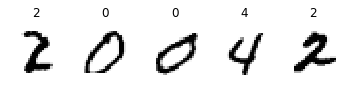

In [29]:
pick = np.random.randint(1,9999,5)

for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
  plt.title(predict[pick[i]])
  plt.axis('off')

## 結論
這次是亂做的神經網路，有時會出現很糟糕的結果，接下來課程會介紹簡單的手法，讓學習效果較穩定，增加學習效率。